In [1]:
import pandas as pd

from imdb import Cinemagoer

### relevant fields:

**Keys**
- 'imdbID',
- 'title',

**Meta Data**
- 'original title',
- 'rating',
- 'director',
- 'runtimes',
- 'genres',
- 'box office',
- 'cover url',
- 'year', 
- 'top 250 rank',
- 'awards',
- 'akas',
- 'cast',

**Geo**
- 'country codes'
- 'countries',
- 'locations',
- 'language codes',


**Text**
- 'plot',
- 'plot outline',
- 'critic reviews',
- 'reviews',
- 'quotes'

In [ ]:
'awards'  ???

# Get Movie Data

In [33]:
"""
get all movie data (meta + text + locations) in a single object
"""
def get_all_movie_data(movie_name):
    ia = Cinemagoer()
    movie_search = ia.search_movie(movie_name)
    movie_id = movie_search[0].movieID
    movie_data = ia.get_movie(movie_id)
    ia.update(movie_data,'quotes')
    ia.update(movie_data,'reviews')
    ia.update(movie_data,'locations')
    
    
    return movie_data

"""
create meta_data dict
"""
def get_meta_data(movie_data):
    
    # preprocess directors in case of list
    directors = []
    directors_obj = movie_data['director']
    for director in directors_obj:
        directors.append(director['name'])

    # preprocess cast list only keep top 5 listed
    cast = []
    cast_obj = movie_data['cast']
    for actor in cast_obj:
        cast.append(actor['name'])

    cast = cast[:5]

    # collect all data points to dict
    movie_meta = { "imdb_id": movie_data['imdbID'],
                   "title": movie_data['title'],
                   "rating": movie_data['rating'],
                   "director": directors,
                   "runtime" : '{0} Min'.format(movie_data['runtimes'][0]),
                   "genres" : movie_data['genres'],
                   "year" : movie_data['year'],
                   "box_office" : movie_data['box office']['Cumulative Worldwide Gross'],
                   "top_250_rank" : movie_data['top 250 rank'],
                   "cast" : cast, 
                   "cover_url" : movie_data['cover url'],
                   "akas" : movie_data['akas'],
                   "countries" : movie_data['countries']
                 }
    return movie_meta

"""
create quote df
"""
def get_movie_quotes_df(movie_data):
    #create quotes dict
    quotes_dict = {"imdb_id": movie_data['imdbID'],
                   "title": movie_data['title'],
                   "quotes": movie_data['quotes']}
    #create quotes df
    quotes_df = pd.DataFrame(quotes_dict)
    #turn quotes from lists to strings
    quotes_df['quotes'] = quotes_df.apply(lambda x : ", ".join(x['quotes']), axis=1)
    
    return quotes_df


"""
create reviews df
"""
def get_movie_reviews_df(movie_data):
    #create quotes df
    reviews_df = pd.DataFrame(movie_data['reviews'])
    reviews_df['imdb_id'] = movie_data['imdbID']
    reviews_df['title'] = movie_data['title']
      
    return reviews_df


"""
create filming locations df
"""
def get_movie_locations_df(movie_data):
    #create quotes df
    locations_df = pd.DataFrame(movie_data['locations'])
    locations_df['imdb_id'] = movie_data['imdbID']
    locations_df['title'] = movie_data['title']
    locations_df = locations_df.rename(columns={0: "locations"}) 
    return locations_df

"""
main function
"""
def movie_data(movie_name):

    movie_data = get_all_movie_data(movie_name)
    movie_meta = get_meta_data(movie_data)
    quotes_df = get_movie_quotes_df(movie_data)
    reviews_df = get_movie_reviews_df(movie_data) 
    locations_df = get_movie_locations_df(movie_data)

    return movie_meta, quotes_df, reviews_df, locations_df


'''
if __name__ == '__main__':

    movie_name = input("What Is Your Favourite Movie? : ")
    movie_meta, quotes_df, reviews_df, locations_df = movie_data(movie_name)
    print('Movie Details: \n', movie_meta)
    print('\n')
    print('First 5 Quotes: \n',quotes_df.head())
    print('\n')
    print('First 5 Reviews: \n', reviews_df.head())
    print('\n')
    print('First 5 Locations: \n',locations_df.head())
'''

'\nif __name__ == \'__main__\':\n\n    movie_name = input("What Is Your Favourite Movie? : ")\n    movie_meta, quotes_df, reviews_df, locations_df = movie_data(movie_name)\n    print(\'Movie Details: \n\', movie_meta)\n    print(\'\n\')\n    print(\'First 5 Quotes: \n\',quotes_df.head())\n    print(\'\n\')\n    print(\'First 5 Reviews: \n\', reviews_df.head())\n    print(\'\n\')\n    print(\'First 5 Locations: \n\',locations_df.head())\n'

In [34]:
movie_meta, quotes_df, reviews_df, locations_df =  movie_data('matrix')

In [35]:
locations_df.columns

Index(['locations', 'imdb_id', 'title'], dtype='object')

In [31]:
! pip show pandas

DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.
Name: pandas
Version: 0.25.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: http://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /home/tomershtein/.pyenv/versions/3.5.10/envs/profanity_detector/lib/python3.5/site-packages
Requires: numpy, python-dateutil, pytz
Required-by: hatesonar


In [120]:
quotes_df.head()

,imdb_id,quotes,title
0,0133093,Morpheus: This is your last chance. After this...,The Matrix
1,0133093,Agent Smith: I'd like to share a revelation th...,The Matrix
2,0133093,Spoon boy: Do not try and bend the spoon. That...,The Matrix
3,0133093,Neo: What are you trying to tell me? That I ca...,The Matrix
4,0133093,"Morpheus: Neo, sooner or later you're going to...",The Matrix


In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [50]:
reviews_df.head()

,author,content,date,helpful,not_helpful,rating,title,imdb_id
0,ur2467618,There are currently almost 2800 reviews on IMD...,22 February 2018,39,178,7.0,The Matrix,0133093
1,ur20552756,'The Matrix' may not be one of the very greate...,20 February 2017,38,10,9.0,The Matrix,0133093
2,ur0482513,"What is THE MATRIX? Well, let me tell you: it'...",26 August 2016,14,7,9.0,The Matrix,0133093
3,ur2898520,The Wachowski brothers have created one of the...,9 November 2013,13,6,9.0,The Matrix,0133093
4,ur0278527,"This is one of those movies that ""everyone"" ha...",20 August 2019,17,6,9.0,The Matrix,0133093


In [97]:
text_df = reviews_df.iloc[:, 1:2]

In [112]:
text_series = text_df.squeeze()

In [70]:
remove_words = reviews_df['title'][0].split()
remove_words.append('movie')
remove_words.append('film')
remove_words

['The', 'Matrix', 'movie', 'film']

In [93]:
text = " ".join(reviews_df.content)

In [94]:
for word in ['movie','film','Matrix']:
    text = text_series.replace(word,"")

In [95]:
text

'There are currently almost 2800 reviews on IMDB for this ....and so what I have to say about the  really isn\'t all that important. It also is one of the highest rated s ever on IMDB. And, so much has been said about the , I think I\'ll be rather brief.The plot involves a guy who learns that nothing be sees or does is real...and that the world is nothing like anyone thinks. This is because in the dystopian future, machines keep folks in pods and they live out their lives in a phony existence.The \'s story is interesting...and very existential. I like that aspect of it very much. But the  has a weakness for me and I am sure some other folks might feel the same way...there is just too much action. The  is one scene after another after another--with lots of action, violence and CGI...so much that it boggles the mind. For me, that left me rather tired when the  was over. I liked it...but I also didn\'t want any more and can\'t see me watching any of the sequels. \'The \' may not be one of

In [65]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

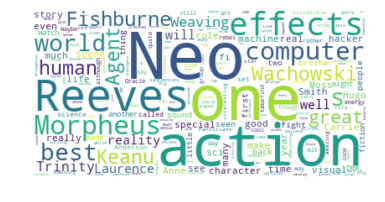

In [66]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [115]:
!pwd

/home/tomershtein/code/atathana/profanity_detector/notebooks


In [114]:
from profanity_detector.movie_features import *

ImportError: No module named 'profanity_detector'

In [123]:
def create_word_cloud(df):
	#createing text object from text column in df 
	text_df = df.iloc[:, 1:2]
	text_series = text_df.squeeze()
	text = " ".join(text_series)


	#removing suprficial words
	remove_words = df['title'][0].split()
	remove_words.append('movie')
	remove_words.append('film')
	remove_words

	for word in remove_words:
	    text = text.replace(word,"")

	word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)


	return word_cloud

In [118]:
def plot_word_cloud(word_cloud):

	plt.imshow(word_cloud, interpolation='bilinear')
	plt.axis("off")
	plt.show()

In [124]:
create_word_cloud(quotes_df.iloc[:, 1:2])

KeyError: 'title'